# Cleaning US Census Data


You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`

In [31]:
df_list = []
files = glob.glob('states*')

for _file in files:
    df = pd.read_csv(_file)
    df_list.append(df)
us_census = pd.concat(df_list)

## Inital view of the Data
***

In [32]:
display(us_census.head(25),us_census.dtypes,us_census.isnull().sum())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F
1,1,Hawaii,1406299,9.186708860759486%,25.032278481012657%,2.052848101265823%,0.1449367088607596%,36.59208860759495%,8.758860759493672%,$73264.42628205128,709871M_696428F
2,2,Idaho,1616547,11.505369127516781%,83.1362416107383%,0.5667785234899323%,1.468120805369128%,1.135906040268457%,0.1271812080536914%,$48017.31543624161,810464M_806083F
3,3,Illinois,12873761,15.601733547351516%,60.85980738362764%,17.108410914927717%,0.11842696629213499%,4.475377207062604%,0.02003210272873195%,$59587.04887459807,6316899M_6556862F
4,4,Indiana,6568645,6.536744186046501%,78.43189368770771%,11.18697674418606%,0.1940863787375415%,1.5782724252491687%,0.03262458471760798%,$48616.22784810127,3235263M_3333382F
5,5,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,$53017.75304136253,1534595M_1558931F
0,0,New Jersey,8904413,18.74950049950049%,56.488761238761285%,14.387862137862117%,0.11533466533466513%,8.159990009990018%,0.031318681318681325%,$76581.08341708542,4343027M_4561386F
1,1,New Mexico,2084117,45.28293172690762%,40.69799196787147%,1.7550200803212852%,9.248594377510045%,1.23433734939759%,0.04277108433734938%,$47329.96787148595,1032414M_1051703F
2,2,New York,19673174,17.241424747786684%,56.4701050030883%,15.668046119003515%,0.32163887173152117%,7.8971587399629355%,0.023450689726168417%,$64290.74911292006,9541801M_10131373F
3,3,North Carolina,9845333,8.464762782128062%,64.5976508521419%,21.3951174573929%,1.0854905573468434%,2.317457392906495%,0.05232611699677568%,$49937.46413697362,4795408M_5049925F


Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
dtype: int64

## Renaming and Shapping the Columns
***

In [33]:
us_census = us_census.rename(columns={
    'Unnamed: 0': 'Id',
    'TotalPop': 'Population',
    'GenderPop': 'Gender_Qty'
})
us_census.columns = us_census.columns.str.upper()

## Cleaning the Strings and  Converting the Data Types 

For the object columns, we're cleaning the characters that convert them in objects such as `%` and `$`.<br>
Then, we're converting those object types into `float` and `int` depending in our necessities.
***

In [34]:
#Cleaning the signs '$' from the 'INCOME' column
us_census['INCOME'] = round(pd.to_numeric(us_census['INCOME'].str.strip('[\$]')), 2)

#Getting, splitting,cleaning and asigning the male and females values to the respective columns
splitted_gender_list = us_census['GENDER_QTY'].str.split('_')
us_census['MEN'] = [round(pd.to_numeric(i.strip('[M]')),0) for i in splitted_gender_list.str.get(0)if i[-1] == 'M']
us_census['WOMEN'] = [round(pd.to_numeric(i.strip('[F]')),0) for i in splitted_gender_list.str.get(1)if i[-1] == 'F']

#Getting only the race columns with its values and cleaning the '%' sign from every row
race_columns = us_census.columns[3:9]
def clean_race_columns(columns):
    for i in columns:
        us_census[i] = round(pd.to_numeric(us_census[i].str.strip('%')), 0)
clean_race_columns(race_columns)

#Dropping the columns that are useless at this point
us_census = us_census.drop('GENDER_QTY', axis=1).reset_index(drop=True)
us_census = us_census.drop('ID', axis=1).reset_index(drop=True)

## Filling the NaN values and Cleaning the Duplicated Rows
In order to make the `Plot Histograms`, first of all we need to fill the NaN values with something that makes sense.<br>
* In this case, for the `WOMEN` column we're filling it with the difference between the `POPULATION` column and the `MEN` column<br>
* And for the `PACIFIC` column we are use the sum of all the race rows for that nan column, minus 100.

In [37]:
#Filling nan-values on the "WOMEN" column with the difference of the 'POPULATION' column minus the 'MEN' column
us_census['WOMEN'] = us_census['WOMEN'].fillna(us_census['POPULATION'] - us_census['MEN'])

race_columns_2 = us_census.iloc[:,2:7]
us_census['PACIFIC'] = us_census['PACIFIC'].fillna(100 - abs(race_columns_2.sum(axis=1)))

#Dropping all the duplicated rows
us_census = us_census.drop_duplicates(subset=['STATE'])

display(us_census.head(20))
display('Null Values:',us_census.isnull().sum())

,STATE,POPULATION,HISPANIC,WHITE,BLACK,NATIVE,ASIAN,PACIFIC,INCOME,MEN,WOMEN
0,Georgia,10006693,8.0,54.0,32.0,0.0,3.0,0.0,50811.08,4883331,5123362.0
1,Hawaii,1406299,9.0,25.0,2.0,0.0,37.0,9.0,73264.43,709871,696428.0
2,Idaho,1616547,12.0,83.0,1.0,1.0,1.0,0.0,48017.32,810464,806083.0
3,Illinois,12873761,16.0,61.0,17.0,0.0,4.0,0.0,59587.05,6316899,6556862.0
4,Indiana,6568645,7.0,78.0,11.0,0.0,2.0,0.0,48616.23,3235263,3333382.0
5,Iowa,3093526,5.0,88.0,3.0,0.0,2.0,0.0,53017.75,1534595,1558931.0
6,New Jersey,8904413,19.0,56.0,14.0,0.0,8.0,0.0,76581.08,4343027,4561386.0
7,New Mexico,2084117,45.0,41.0,2.0,9.0,1.0,0.0,47329.97,1032414,1051703.0
8,New York,19673174,17.0,56.0,16.0,0.0,8.0,0.0,64290.75,9541801,10131373.0
9,North Carolina,9845333,8.0,65.0,21.0,1.0,2.0,0.0,49937.46,4795408,5049925.0


'Null Values:'

STATE         0
POPULATION    0
HISPANIC      0
WHITE         0
BLACK         0
NATIVE        0
ASIAN         0
PACIFIC       0
INCOME        0
MEN           0
WOMEN         0
dtype: int64

## Plot Histograms

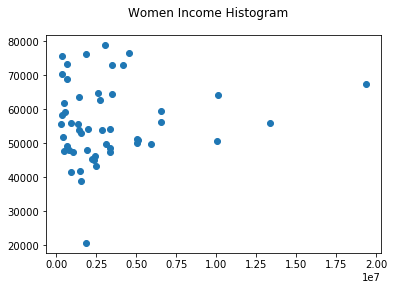

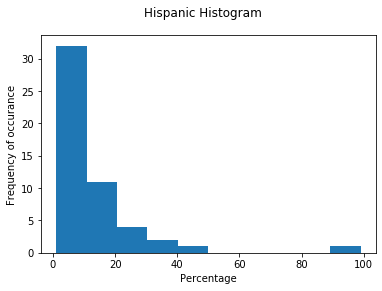

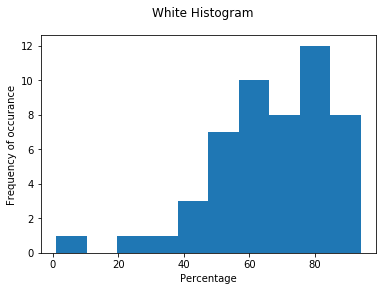

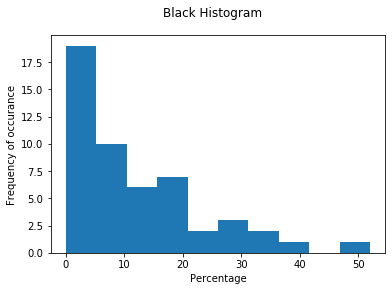

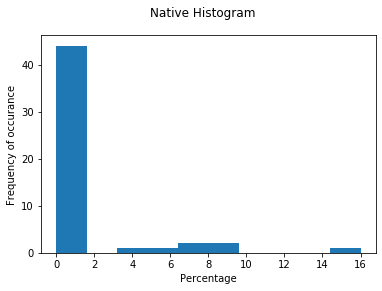

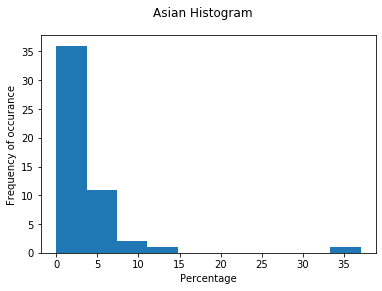

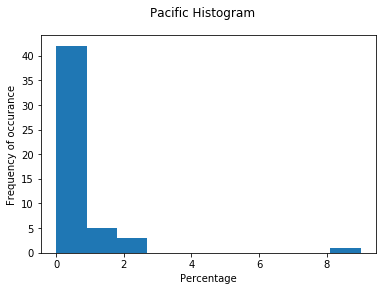

In [36]:
#Creating Women Income Histogram
plt.suptitle('Women Income Histogram')
plt.scatter(us_census['WOMEN'], us_census['INCOME'])
plt.show()

#Creating the Race Plot Histograms
for i in race_columns:
    plt.suptitle((i + ' histogram').title())
    plt.hist(us_census[i])
    plt.xlabel('Percentage')
    plt.ylabel('Frequency of occurance')
    plt.show()